In [16]:
import pathlib
import os
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

from surface_sim.models import SI1000NoiseModel
from lomatching import MoMatching

from bootstrap_analysis import multiround_bootstrap_plot

In [17]:
import matplotlib
import matplotlib.ticker as ticker

matplotlib.rcParams.update(
    {
        "font.size": 11,
        "font.family": "cmr10",
        "font.weight": "normal",
        'axes.unicode_minus': False,
        "axes.formatter.use_mathtext": True,
        "text.usetex": True,
        "axes.formatter.limits": (0,0),
    }
)

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

int_to_alph = {i: s for i, s in enumerate("abcdefghijklmnopqrstuvwxyz")}

In [21]:
# INPUTS
FILE_NAME = "20250130_cliffords_modulo_paulis_and_swap.txt"
DISTANCES = [3, 5, 7]
PROBS = [
    0.0001,
    0.0002,
    0.0005,
    0.001,
    0.002,
    0.003,
    0.004,
    0.0045,
    0.005,
    0.0055,
    0.006,
    0.0065,
    0.007,
    0.008,
    0.01,
    0.02,
]
NOISE_MODEL = SI1000NoiseModel
BASES = ["Z", "X"]
FRAME = "pre-gate"
DECODER = MoMatching

# DATA STORAGE
NAME_FORMAT = "{exp_name}_{noise_model}_{decoder}_d{distance}_b{basis}_f{frame}_s0_p{prob:0.10f}.txt"
DATA_DIR = (
    pathlib.Path(os.getcwd().replace("two-qubit-clifford_experiments_thresholds", "two-qubit-clifford_experiments_lom_decoder"))
)

BASIS = Z
Standard Error Analysis
τ_LF = (0.5036 ± 1.4204)%
Bootstrap Analysis
τ_BS  = (0.5036 ± 0.0000)%
CI_BS = (0.5036, 0.5036)%
      = (-0.0000, 0.0000)%


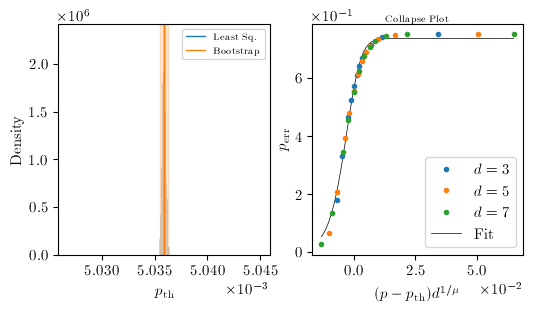

BASIS = X
Standard Error Analysis
τ_LF = (0.4963 ± 1.3699)%
Bootstrap Analysis
τ_BS  = (0.4963 ± 0.0000)%
CI_BS = (0.4963, 0.4964)%
      = (-0.0000, 0.0000)%


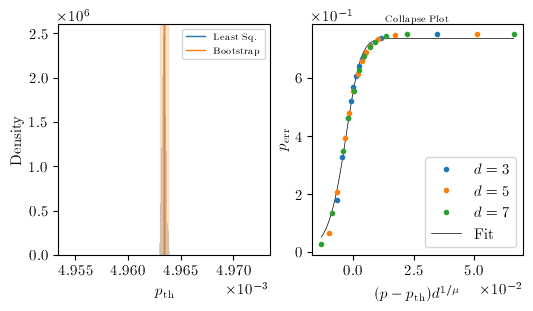

In [22]:
EXPERIMENTS = list(range(360))
PROBS_ = deepcopy(PROBS)

for basis in BASES:
    print(f"=======================\nBASIS = {basis}")
    NUM_FAILURES = np.load(DATA_DIR / "num-failures_SI1000.npy")
    NUM_SAMPLES = np.load(DATA_DIR / "num-samples_SI1000.npy")

    # remove low error probabilites, which make the fit worse
    PROBS = PROBS_[4:]
    NUM_FAILURES = NUM_FAILURES[:, :, :, :, 4:]
    NUM_SAMPLES = NUM_SAMPLES[:, :, :, :, 4:]

    # "average" across all circuits 
    #(it is a weighted average because maybe the number of samples it is not the same for all of them)
    NUM_FAILURES = NUM_FAILURES.sum(axis=0)
    NUM_SAMPLES = NUM_SAMPLES.sum(axis=0)
    
    # allow for only one frame and one basis
    if FRAME != "pre-gate":
        raise ValueError
    
    NUM_FAILURES = NUM_FAILURES[BASES.index(basis), 0]
    NUM_SAMPLES = NUM_SAMPLES[BASES.index(basis), 0]
    assert NUM_FAILURES.shape == NUM_SAMPLES.shape == (len(DISTANCES), len(PROBS))
    
    # prepare data for the code that Timo Hillmann sent me, basically it should be in
    # the shape of (num_distances, num_error_probabilities)
    ps = np.array([PROBS]*len(DISTANCES))
    ds = np.array([DISTANCES]*len(PROBS)).T
    failures = NUM_FAILURES
    shots = NUM_SAMPLES
    rounds = -1

    filepath = pathlib.Path(f"threshold_fitting_{basis}_SI1000/")
    filepath.mkdir(exist_ok=True, parents=True)
    fig, ax = plt.subplots(ncols=2, figsize=(6, 3))
    fig, ax, data = multiround_bootstrap_plot(
        ps,
        ds,
        failures,
        shots,
        rounds=rounds,
        n_samples=1000,
        filepath=filepath,
        fig=fig,
        ax=ax,
        weighted=False,
    )
    plt.show()